<a href="https://colab.research.google.com/github/ShubhamGupta2505/MachineLearningPractice/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving FuelConsumption.csv to FuelConsumption.csv


In [4]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['FuelConsumption.csv']))

In [5]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


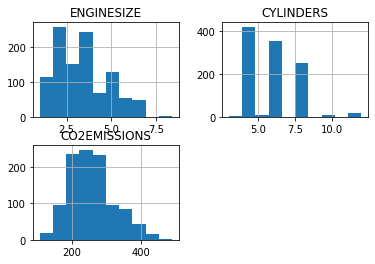

In [8]:
viz = cdf[['ENGINESIZE','CYLINDERS','CO2EMISSIONS']]
viz.hist()
plt.show()

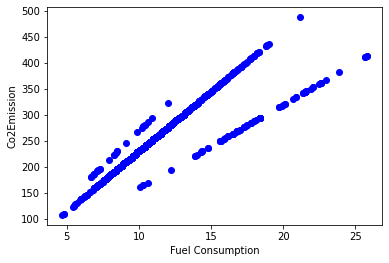

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='blue')
plt.xlabel("Fuel Consumption")
plt.ylabel("Co2Emission")
plt.show()

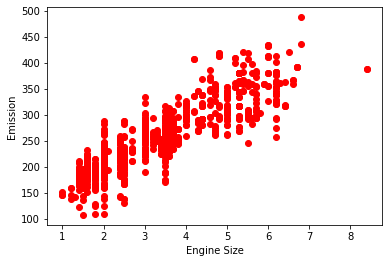

In [10]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

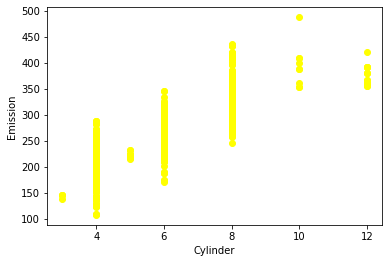

In [11]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='yellow')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

In [12]:
mask = np.random.rand(len(df))<0.8
train = cdf[mask]
test = cdf[~mask]

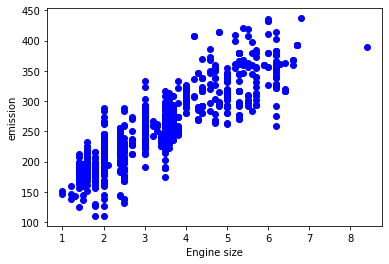

In [13]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel("Engine size")
plt.ylabel("emission")
plt.show()

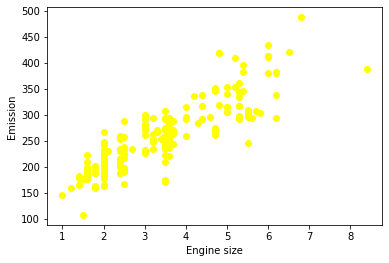

In [17]:
plt.scatter(test.ENGINESIZE,test.CO2EMISSIONS,color='yellow')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [15]:
from sklearn import linear_model
regression = linear_model.LinearRegression()

In [19]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print('Coefficients :',regression.coef_)
print('Intercept :',regression.intercept_)

Coefficients : [[38.87675683]]
Intercept : [126.1587424]


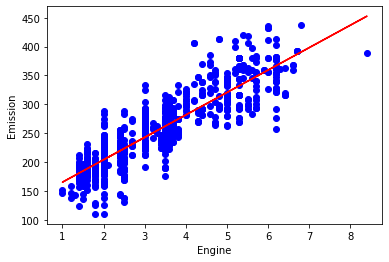

In [22]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_x,regression.coef_[0][0]*train_x+regression.intercept_[0],'-r')
plt.xlabel("Engine")
plt.ylabel("Emission")
plt.show()

In [24]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regression.predict(test_x)


In [27]:
print("Mean Absolute Error %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual Sum of Square %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2 Score %.2f" % r2_score(test_y , test_y_))

Mean Absolute Error 23.86
Residual Sum of Square 1012.95
R2 Score 0.76


In [28]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.86
Residual sum of squares (MSE): 1012.95
R2-score: 0.76
